In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.ensemble import GradientBoostingClassifier  # Corrected Typo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
IMG_SIZE = (64, 64)

CATEGORIES = ['cats', 'dogs', 'snakes']  # Use '=' and square brackets for lists

BASE_FOLDER = r"D:\SEM 8\Computer Vision\Animals"  # Corrected assignment and syntax


In [7]:
# Function to extract HOG features
def extract_hog_features(image):
    # Resize the image to the desired IMG_SIZE
    image = cv2.resize(image, IMG_SIZE)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    features = hog(
        gray, 
        orientations=9, 
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys', 
        visualize=False # Set to True if you want to visualize the HOG image
       
    )
    
    return features.flatten()


In [8]:
# Function to Load images and extract HOG features
def load_images():
    X, y = [], []  # Initialize empty lists for features and labels

    for label, category in enumerate(CATEGORIES):
        folder_path = os.path.join(BASE_FOLDER, category)  # Corrected variable name

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)  # Corrected variable name
            img = cv2.imread(img_path)

            if img is not None:
                features = extract_hog_features(img)  # Extract HOG features
                X.append(features)
                y.append(label)

    return np.array(X), np.array(y)


In [9]:
X, y = load_images()


In [10]:
# Split dataset (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.70


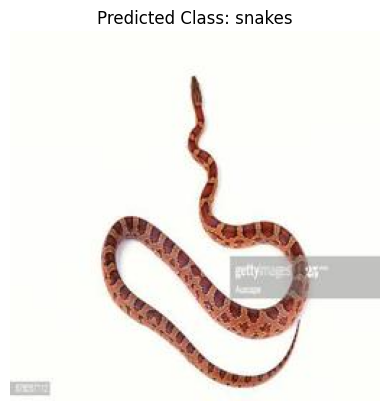

In [14]:
# Function to predict a new image
def predict_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print('Error loading the image')
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Feature extraction using HOG
    features = extract_hog_features(img).reshape(1, -1)

    # Predict the label
    predicted_label = model.predict(features)[0]

    # Display image with predicted class
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {CATEGORIES[predicted_label]}")
    plt.axis('off')
    plt.show()

# Example usage
predict_image(r'D:\SEM 8\Computer Vision\Animals\snakes\2_0001.jpg')
